## Mitsiu Alejandro Carreño Sarabia - E23S-18014

# Examen práctico del primer parcial
Utiliza solo librerías de algebra matricial como numpy y scipy. Librerías de visualización y cualquier función que sea parte del core de Python.   
                              
1 Implementa una neurona con sus componentes básicos.       
1.1 Enumera cuales son estos componentes, para cada uno      
1.1.1 Cuáles son las posibles opciones de métodos       
1.1.2 Porque se ha decidido en esta en particular         
1.1.3 Qué ventajas o desventajas conlleva el método seleccionado        
                       
2 Agrega a la implementación necesaria para entrenar la neurona         
2.1 De la misma manera que en el punto anterior, enumera cuales son estos componentes, para cada uno       
2.1.1 Cuáles son las posibles opciones de métodos        
2.1.2 Porque se ha decidido en esta en particular       
2.1.3 Qué ventajas o desventajas conlleva el método seleccionado   
                                   
3 Utiliza tu implementación para clasificar la base de datos [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) de sklearn         
3.1 Utiliza solo dos clases, seleccionadas de manera aleatoria.         
3.2 Realiza los pasos de pre-procesamiento que consideres necesarios para mejorar la calidad del clasificador.        
3.3 Entrena la neurona para predecir cuál es el número de la imagen.         
3.4 Explica las razones detrás de la selección de los distintos parámetros. Como pueden ser (no está limitado a solo esos):        
3.4.1 Epochs       
3.4.2 Tamaño de batch       
3.4.3 Criterio de alto        
3.4.4 Otras técnicas de entrenamiento      
3.5 Obtén el valor de la pérdida (loss) y da una explicación de cuando y porque cambian estos valores (o porque no)          
3.5.1 Pequeño bonus si realizas esta explicación con un gráfico          
3.6 Evalúa el desempeño contra una muestra en la que nunca se haya entrenado.        
3.6.1 Da los principales indicadores de calidad          
3.6.2 Interpreta cuál es el significado cada valor de los indicadores           
                                   
4 Presenta una conclusión final del modelo creado. Cuales son las fortalezas y debilidades, así como sugerencias para mejorar su desempeño.           
                               
Presenta tus evidencias y resultados en un cuaderno de Colab. Debe incluir todas las variables y librerías para que pueda ser ejecutado de manera secuencial. Así también debe contener la documentación necesaria que explique el código y los aspectos tomados en cuenta para tomar esas decisiones. 

# 1 Implementa una neurona con sus componentes básicos.
## 1.1 Enumera cuales son estos componentes, para cada uno

In [1]:
class Neurona():
    '''
    Constructor de la neurona:
        Toda neurona requiere un conjunto de pesos que 
            aumentan, disminuyen o dejan igual una entrada(un peso para cada entrada)
            inicialmente le asingnamos valores aleatorios
        Un único valor de bías (sesgo), independiente de las entradas
        Además, requiere una función de activación la cuál define dado cierta entrada neta
            si la neurona genera o no una señal de salida y con cuanta intensidad.
    '''
    def __init__(self, n_features, func_activ):
        self.pesos = np.random.rand(n_features)
        self.bias = np.random.rand()
        self.func_activ = func_activ
        
    '''
    Entrada neta
        Cada entrada se aumenta/disminuye con su peso correspondiente y se suman todas las 
            entradas modificadas (producto punto), además se suma el bios
    '''
    def CalcEntradaNeta(self, entrada):
        return np.dot(entrada, self.pesos) + self.bias
    
    '''
    Salida
        La salida de la neurona se da evaluando la entrada neta en la función de activación
    '''
    def Salida(self, entrada):
        return self.func_activ(self.CalcEntradaNeta(entrada))
        
    '''
    Setters
        Las siguientes funciones son para poder actualizar el valor de bias y peso entre epochs
    '''
    def SetBias(self, bias):
        self.bias = bias
        
    def SetPesos(self, pesos):
        self.pesos = pesos
    
    '''
    Getters
        Las siguientes funciones son para poder obtener el valora actúal de bias y peso entre epochs
    '''
    def GetBias(self):
        return self.bias
    def GetPesos(self):
        return self.pesos

### 1.1.1 Cuáles son las posibles opciones de métodos
En nuestra implementación de neurona quedan pendientes los valores del constructor:
- n_features (64)
- func_activ (sigmoid)

Cuando la comencemos a entrenar para clasificar el dataset digits n_features tomará el valor de 64 (cada imágen tiene 64 valores = 64 entradas)
Respecto a la función de activación, existen distintas funciones (implementadas en Keras) como:
- Elu
- Exponential
- Gelu
- Sigmoid
- Hard_sigmoid
- Lineal
- Relu
- Selu

En este caso por tratarse de una clasificación dicotómica elegiré una función sigmoidea que me permita estimar la probabilidad de que cierto input pertenezca a una categoría (un número) o rebasando cierto límite otra categoría (el otro número). Esta decisión esta basada totalmente en las caracteristicas del problema, así como en la restricción de usar librerías dedicadas al entrenamiento de redes neuronales, por lo que otro problema con diferentes caracteristicas (por ejemplo un problema de regresión) y restricciones probablemente pueda ser resuelto con otra función de activación.

# 2 Agrega a la implementación necesaria para entrenar la neurona

In [2]:
class Perceptron():
    '''
    Recordemos que un perceptron es una red neuronal de una única neurona (clase neurona) 
    en el que podemos realizar un aprendizaje supervisado para generar una clasificación binaria 
    '''
     
    '''
    Constructor del perceptron: La tarea del perceptron es realizar el entrenamiento 
    de nuestra Neurona definida en el apartado 1, para ello debemos definir:
        Epochs la cantidad de ciclos en los que se va a evaluar y mejorar el desempeño de nuestra 
            neurona (ajustando sus pesos y bias)
        Learning rate impone un límite para el tamaño de cambio en el ajuste de pesos y bias 
            entre epochs
        Función de perdida, similar a la función de activación, la función de perdida define 
            de que manera cuantificar la diferencia entre el valor predicho por la 
            neurona y el valor real de clasificación
        Función optimizador, es el algoritmo para míminizar el resultado de nuestra función de 
            perdida
        Finalmente nuestro Perceptron necesita una Neurona para operar y entrenar, por lo que 
            decidí emplear una relación de composición (Paradigma de Objetos) en el que
            la Neurona se crea cuando se crea el perceptron.
    '''
    def __init__(self, epochs, learning_rate, func_perdida, func_optimizador, n_features, func_activ):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.func_perdida = func_perdida
        self.func_optimizador = func_optimizador
        self.neurona = Neurona(n_features, func_activ)
        
    '''
    Test
        Una función que permite obtener los valores estimados dato un conjunto de entradas, 
        esta función permite evaluar el desempeño del perceptron
    '''
    def test(self, x_s):
        return [self.neurona.Salida(example) for example in x_s]
        
    
    '''
    Entrenar
        Esta función es para evaluar el desempeño actual de los pesos y bias y realizar 
        actualizaciones que ayuden a mejorar la precisión de las predicciones.
    '''
    def Entrenar(self, x_s, y_s):
        # Iteramos epochs veces
        for i in range(self.epochs):
            escalar_pesos = np.empty(shape=(x_s.shape[1]))
            escalar_bias = 0
            print(f"Epoch {i+1}")
            # Realizar todas las predicciones del dataset completo (epoch)
            y_s_pred = [self.neurona.Salida(example) for example in x_s]
            '''
            Calcular Error 
            Aplicar la función de perdida para medir la diferencia entre los valores predicho por 
            la neurona y los valores real (Calcula el error del epoch)
            '''
            epoch_loss = self.func_perdida(y_s, y_s_pred)
            for i in range(len(x_s)):
                
                # Para cada ejemplo (renglon), calcular pesos y bias
                n_escalar_pesos, n_escalar_bias = gradient(
                    x_s[i], 
                    self.neurona.GetPesos(),  
                    (y_s[i] - y_s_pred[i]) **2, 
                    y_s_pred[i])
                escalar_pesos = escalar_pesos + n_escalar_pesos
                escalar_bias += n_escalar_bias
                '''
                Algunas otras versiones de actualización de pesos y bias
                escalar_pesos += self.neurona.GetPesos()  * (y_s[i] - y_s_pred[i]) * x_s[i]
                escalar_bias += self.neurona.GetBias()  * (y_s[i] - y_s_pred[i])
                '''
                '''
                Algunas otras versiones de actualización de pesos y bias
                escalar_pesos -= learning_rate * (-2 * y_s[i] - y_s_pred[i] ) \
                    * sigmoid_derivative(y_s_pred[i]) * x_s[i]
                '''
                
            # Se actualizan los valores de pesos y bias de la neurona justo antes 
            # de comenzar el procesamiento del nuevo epoch
            self.neurona.SetBias(escalar_bias * self.learning_rate /len(x_s))
            self.neurona.SetPesos(escalar_pesos * self.learning_rate/len(x_s))
            print(f"Loss-->{epoch_loss}")
             

### 2.1.1 Cuáles son las posibles opciones de métodos
Para nuestra implementación del perceptron además de los parametros iniciales (epochs y tasa de aprendizaje) requerimos dos funciones:
- func_perdida
- func_optimizador
Ambas estan enfocadas en permitir y controlar el ajuste de pesos y bias de nuestra neurona durante el entrenamiento. 
Para la función de perdida (que se encarga de cuantificar la diferencia entre el valor real y el predicho) existen multiples opciones en librerías como Keras:
#### Regresión:
- Error Cuadrático Medio (MSE)
- Error Absoluto Medio (MAE)
- Error Huber
#### Clasificación:
- Entropía cruzada binaria
- Entropía cruzada categórica
- Hinge Loss
         
Respecto a la función de optimización, que se encarga de minimizar la función de perdida, en Keras existen implementaciones como:
- SGD
- RMSprop
- Adam
- AdamW
- Adadelta
- Adagrad
- Adamax
- Adafactor
- Nadam
- Ftrl

Para este ejercicio, dada la restricción de liberrías, decidí emplear el método de error cuadrado medio (MSE) como función de perdida y emplear el descenso de gradiente como función de optmización, cabe resaltar que una de las grandes limitantes del descenso de gradiente es que debe ser posible derivar nuestra función de activación (regla que se cumple con la función sigmoidea), de otra manera (por ejemplo con hard sigmoid) no sería posible emplear el descenso de gradiente como función de optimización. 

# 3 Utiliza tu implementación para clasificar la base de datos digits de sklearn

In [3]:
import numpy as np
from sklearn.datasets import load_digits

In [4]:
# Cargamos todos los datos de las 10 clases
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## 3.1 Utiliza solo dos clases, seleccionadas de manera aleatoria.

In [5]:
import random
# Preferí la implementación de random.sample porque me permite generar n valores random sin repetir
classes = random.sample(range(y.min(), y.max()), 2)
print(f"Se va a entrenar para reconocer las clases: {classes}")

Se va a entrenar para reconocer las clases: [0, 2]


In [6]:
#filtered_x = np.ndarray(shape=(0, X.shape[1])) Mala práctica según la documentación
filtered_x = np.empty(shape=(0, X.shape[1]))
filtered_y = np.empty(shape=0)

for clas in classes:
    mask_class = np.ma.masked_where(y == clas, y)
    filtered_x = np.concatenate((filtered_x, X[mask_class.mask]))
    filtered_y = np.concatenate((filtered_y, y[mask_class.mask]))
# Cambio los targets a 0 o 1 para que sea acorde a lo que regresa nuestra función sigmoidea
filtered_y= (filtered_y==classes[0]).astype(int)
    

#Validando filtro
print(f"¿El número de ejemplos en x filtrado ({filtered_x.shape[0]}) \
es igual al de y filtado? \
{filtered_x.shape[0] == filtered_y.shape[0]}")
print(f"Las clases filtradas son: {np.unique(filtered_y)}")


¿El número de ejemplos en x filtrado (355) es igual al de y filtado? True
Las clases filtradas son: [0 1]


## 3.2 Realiza los pasos de pre-procesamiento que consideres necesarios para mejorar la calidad del clasificador. 

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Normalizamos los datos para tener un rango 0-1 reemplazando 0-16
scaler = MinMaxScaler().fit(filtered_x)
normalized_x = scaler.transform(filtered_x)
print(f"El rango de valores por pixel se cambio a {normalized_x.min()} - {normalized_x.max()}")


El rango de valores por pixel se cambio a 0.0 - 1.0


In [8]:
from sklearn.model_selection import train_test_split
# Generamos dos datasets (train 70% y test 30%) 
x_train, x_test, y_train, y_test = train_test_split(normalized_x, filtered_y, test_size=0.30)

# Validando distribución de nuestras clases en train
for clas in classes:
    print(f"Cantidad de {clas} = {np.count_nonzero(y_train == clas)}")


Cantidad de 0 = 117
Cantidad de 2 = 0


## 3.3 Entrena la neurona para predecir cuál es el número de la imagen.

In [9]:
# Función de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de sigmoid (se usa para optimizar en gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Función de perdida
'''
    y_s y y_s_pred se espera que contengan todos los valores y y y_pred del dataset completo
'''
def mean_squared_error(y_s, y_s_pred): 
    #1/n * sum (y-y_pred)**2
    return 1/len(y_s) * np.sum((y_s-y_s_pred)**2)
    #return np.sum((y_s-y_s_pred)**2)

# Función de optimización
def gradient(x, weights, y, y_pred):
    # new_w = w + learning_rate + (target - predict) + feature
    # donde: 
    # predict = derivada de función de activacion para el valor actual
    escalar_pesos = [ (y - sigmoid_derivative(y_pred)) * x[i] for i in range(len(weights))]
    escalar_bias =  (y - sigmoid_derivative(y_pred))
    return escalar_pesos, escalar_bias
 


In [10]:
epochs = 100
learning_rate = 0.1

percep = Perceptron(
    epochs, 
    learning_rate, 
    mean_squared_error,    # Func perdida
    gradient,    # Func optimizador
    normalized_x.shape[1], # n_features
    sigmoid                # Func activ
)


In [11]:
percep.Entrenar(x_train, y_train)


Epoch 1
Loss-->0.4716898612687641
Epoch 2
Loss-->0.2696257792354477
Epoch 3
Loss-->0.2525079322181528
Epoch 4
Loss-->0.2501146532131482
Epoch 5
Loss-->0.24986515796373776
Epoch 6
Loss-->0.2498350697431443
Epoch 7
Loss-->0.24983195965357954
Epoch 8
Loss-->0.24983158188341975
Epoch 9
Loss-->0.249831543151528
Epoch 10
Loss-->0.24983153840666378
Epoch 11
Loss-->0.24983153792453852
Epoch 12
Loss-->0.24983153786491757
Epoch 13
Loss-->0.24983153785891934
Epoch 14
Loss-->0.24983153785816983
Epoch 15
Loss-->0.24983153785809525
Epoch 16
Loss-->0.24983153785808582
Epoch 17
Loss-->0.2498315378580849
Epoch 18
Loss-->0.2498315378580848
Epoch 19
Loss-->0.2498315378580848
Epoch 20
Loss-->0.24983153785808476
Epoch 21
Loss-->0.24983153785808476
Epoch 22
Loss-->0.24983153785808476
Epoch 23
Loss-->0.24983153785808476
Epoch 24
Loss-->0.24983153785808476
Epoch 25
Loss-->0.24983153785808476
Epoch 26
Loss-->0.24983153785808476
Epoch 27
Loss-->0.24983153785808476
Epoch 28
Loss-->0.24983153785808476
Epoch 29
Lo

## 3.4 Explica las razones detrás de la selección de los distintos parámetros.
Se realizaron pruebas con distintas tasas de aprendizaje variando desde 0.5 hasta 0.01, desafortunadamente el problema no parece estar ahí, sino en la función de optimización de pesos y bias, también se eligieron 100 epochs, aunque el estado actual muestra una convergencia rápida (desde los primeros 5 epochs aprox).

## 3.5 Obtén el valor de la pérdida (loss) y da una explicación de cuando y porque cambian estos valores (o porque no)
La perdida es un calculo de la distancia entre los valores reales y los valores predichos, la perdida total del epoch es una ponderación de todos los ejemplos que se analizan durante el epoch, es normal que al principio el loss sea alto, ya que se parte de pesos aleatorios, conforme la optimización comienza a mejorar los pesos, se espera que el loss disminuya hasta que logre la convergencia, punto en el que se alcanzan puntos optimos (que pueden ser locales) en los parametros de peso y bias

## 3.6 Evalúa el desempeño contra una muestra en la que nunca se haya entrenado.

In [15]:
import sklearn
#Primero realizo una evaluación del dataset de entrenamiento para estimar su accuracy
test_acc = sklearn.metrics.accuracy_score(y_train, np.round(percep.test(x_train)))
n_misses = (1-test_acc)*y_test.shape[0]
print(f"Precisión test: {test_acc}\nMuestras mal clasificadas: {round(n_misses)}")

Precisión test: 0.5282258064516129
Muestras mal clasificadas: 50


In [13]:
# Este es un test con datos que el modelo no ha visto
test_acc = sklearn.metrics.accuracy_score(y_test, np.round(percep.test(x_test)))
n_misses = (1-test_acc)*y_test.shape[0]
print(f"Precisión test: {test_acc}\nMuestras mal clasificadas: {round(n_misses)}")

Precisión test: 0.4392523364485981
Muestras mal clasificadas: 60


### 3.6.2 Interpreta cuál es el significado cada valor de los indicadores 
Desafortunadamente como el optimizador no esta funcionando correctamente, el modelo sobreclasifica en una categoría y como tenemos muestras que tienen a tener 50% de cada categoría, muestra un accuracy que ronda el 50% también, pero en realidad intenta categorizar todos los datos igual, entonces estas métricas no son muy informativas respecto al performance del perceptron, sino del muestreo mismo

# 4 Presenta una conclusión final del modelo creado. Cuales son las fortalezas y debilidades, así como sugerencias para mejorar su desempeño.     
En general creo que las partes que componen al perceptron estan bien plasmadas en el código con la desafortunada excepción del optimizador, que prácticamente es el núcleo del sistema, la clara mejora esta en lograr entender porque no ajusta los metaparametros (pesos y bias) de manera correcta, y es entonces cuando se podrá realmente obtener métricas de perdida y accuracy realmente informativas y se podrá jugar un poco más con parametros como cambiar las funciones de activación o perdida. Una fortaleza técnica es que intenté generar las clases lo más polimorficas posibles con la idea de que cambiar incluso funciones de activación u optimización sea tan senicillo como cambiar un parametro tipo tasa de aprendizaje o cantidad de epochs. Seré malo en matematicas pero me defiendo en programación :/         
Finalmente una mejora probablemente sea estudiar mejor el lenguaje Python para extraer el máximo performance, o realizar una implementación en un lenguaje a más bajo nivel (C/C++) para aplicar téncicas como mapeo de memoria o computo paralelo, creo que estos son los casos en que, implementar las mejores estratégias de performance pueden generar grandes recompensas.

0


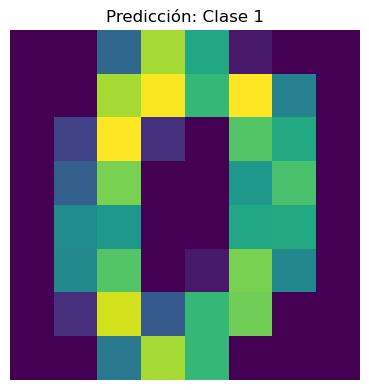

1


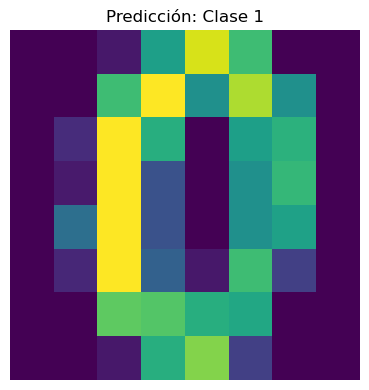

2


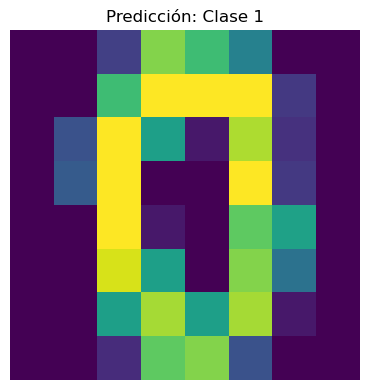

3


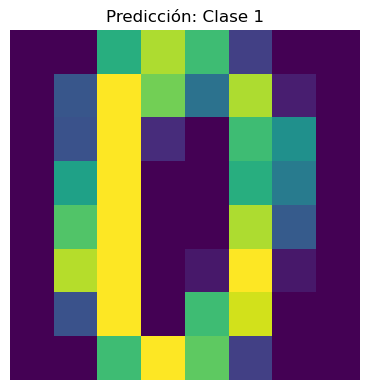

4


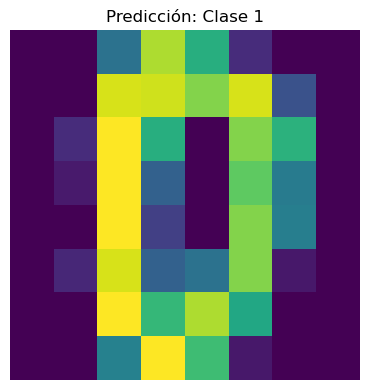

5


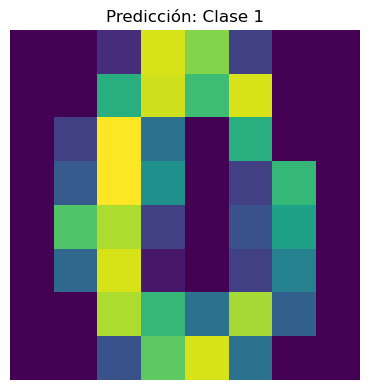

6


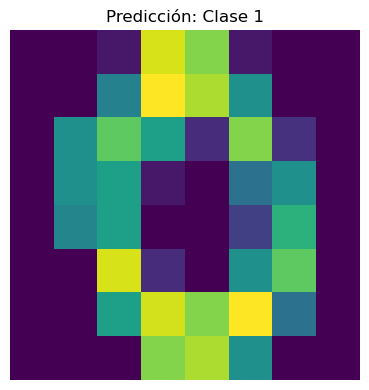

7


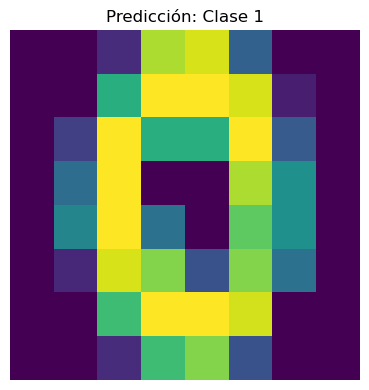

8


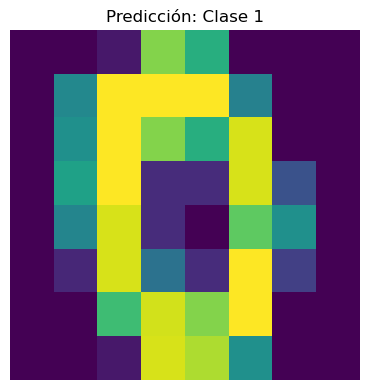

9


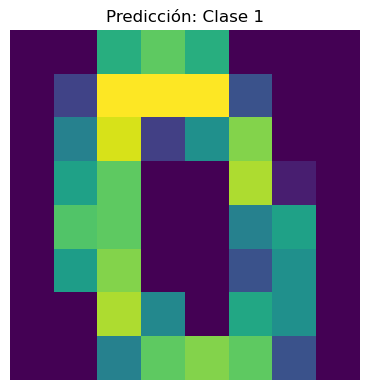

In [16]:
import matplotlib.pyplot as plt
for i in range(0, 10):
    print(i)
    plt.figure(figsize=(12, 4))
    plt.imshow(normalized_x[i].reshape(8, 8), cmap='viridis')
    plt.title(f'Predicción: Clase {filtered_y[i]}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
